In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('Insurance_train.csv')
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


<Axes: xlabel='is_claim', ylabel='count'>

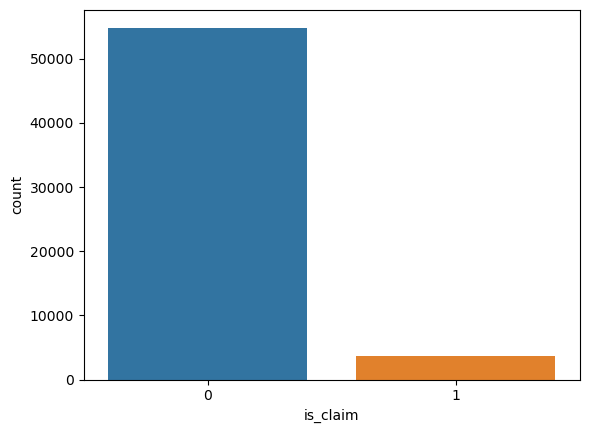

In [10]:
# Target variable

sns.countplot(x = "is_claim", data =train)

In [11]:
train.is_claim.value_counts(normalize = True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In [12]:
# Univariate...
#nums & Cats

train.select_dtypes(exclude = np.number).columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [13]:
num_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 
       'turning_radius', 'length', 'width', 'height',
       'gross_weight']

len(num_cols)

10

In [14]:
# 

cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 
 'make', 'airbags','ncap_rating','cylinder','gear_box']

len(cat_cols)

32

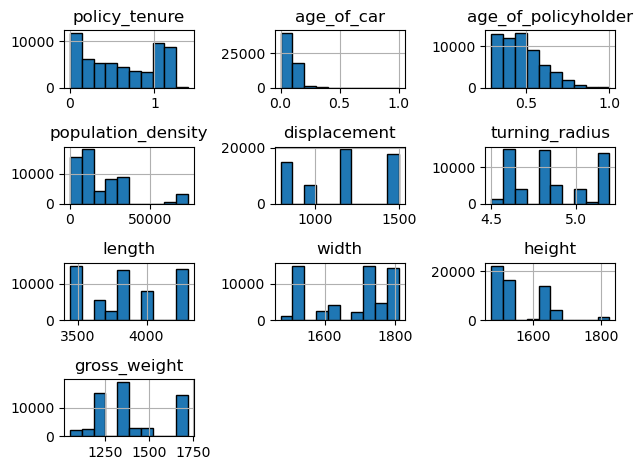

In [15]:
train.loc[:, num_cols].hist(edgecolor = "black")
plt.tight_layout()
plt.show()

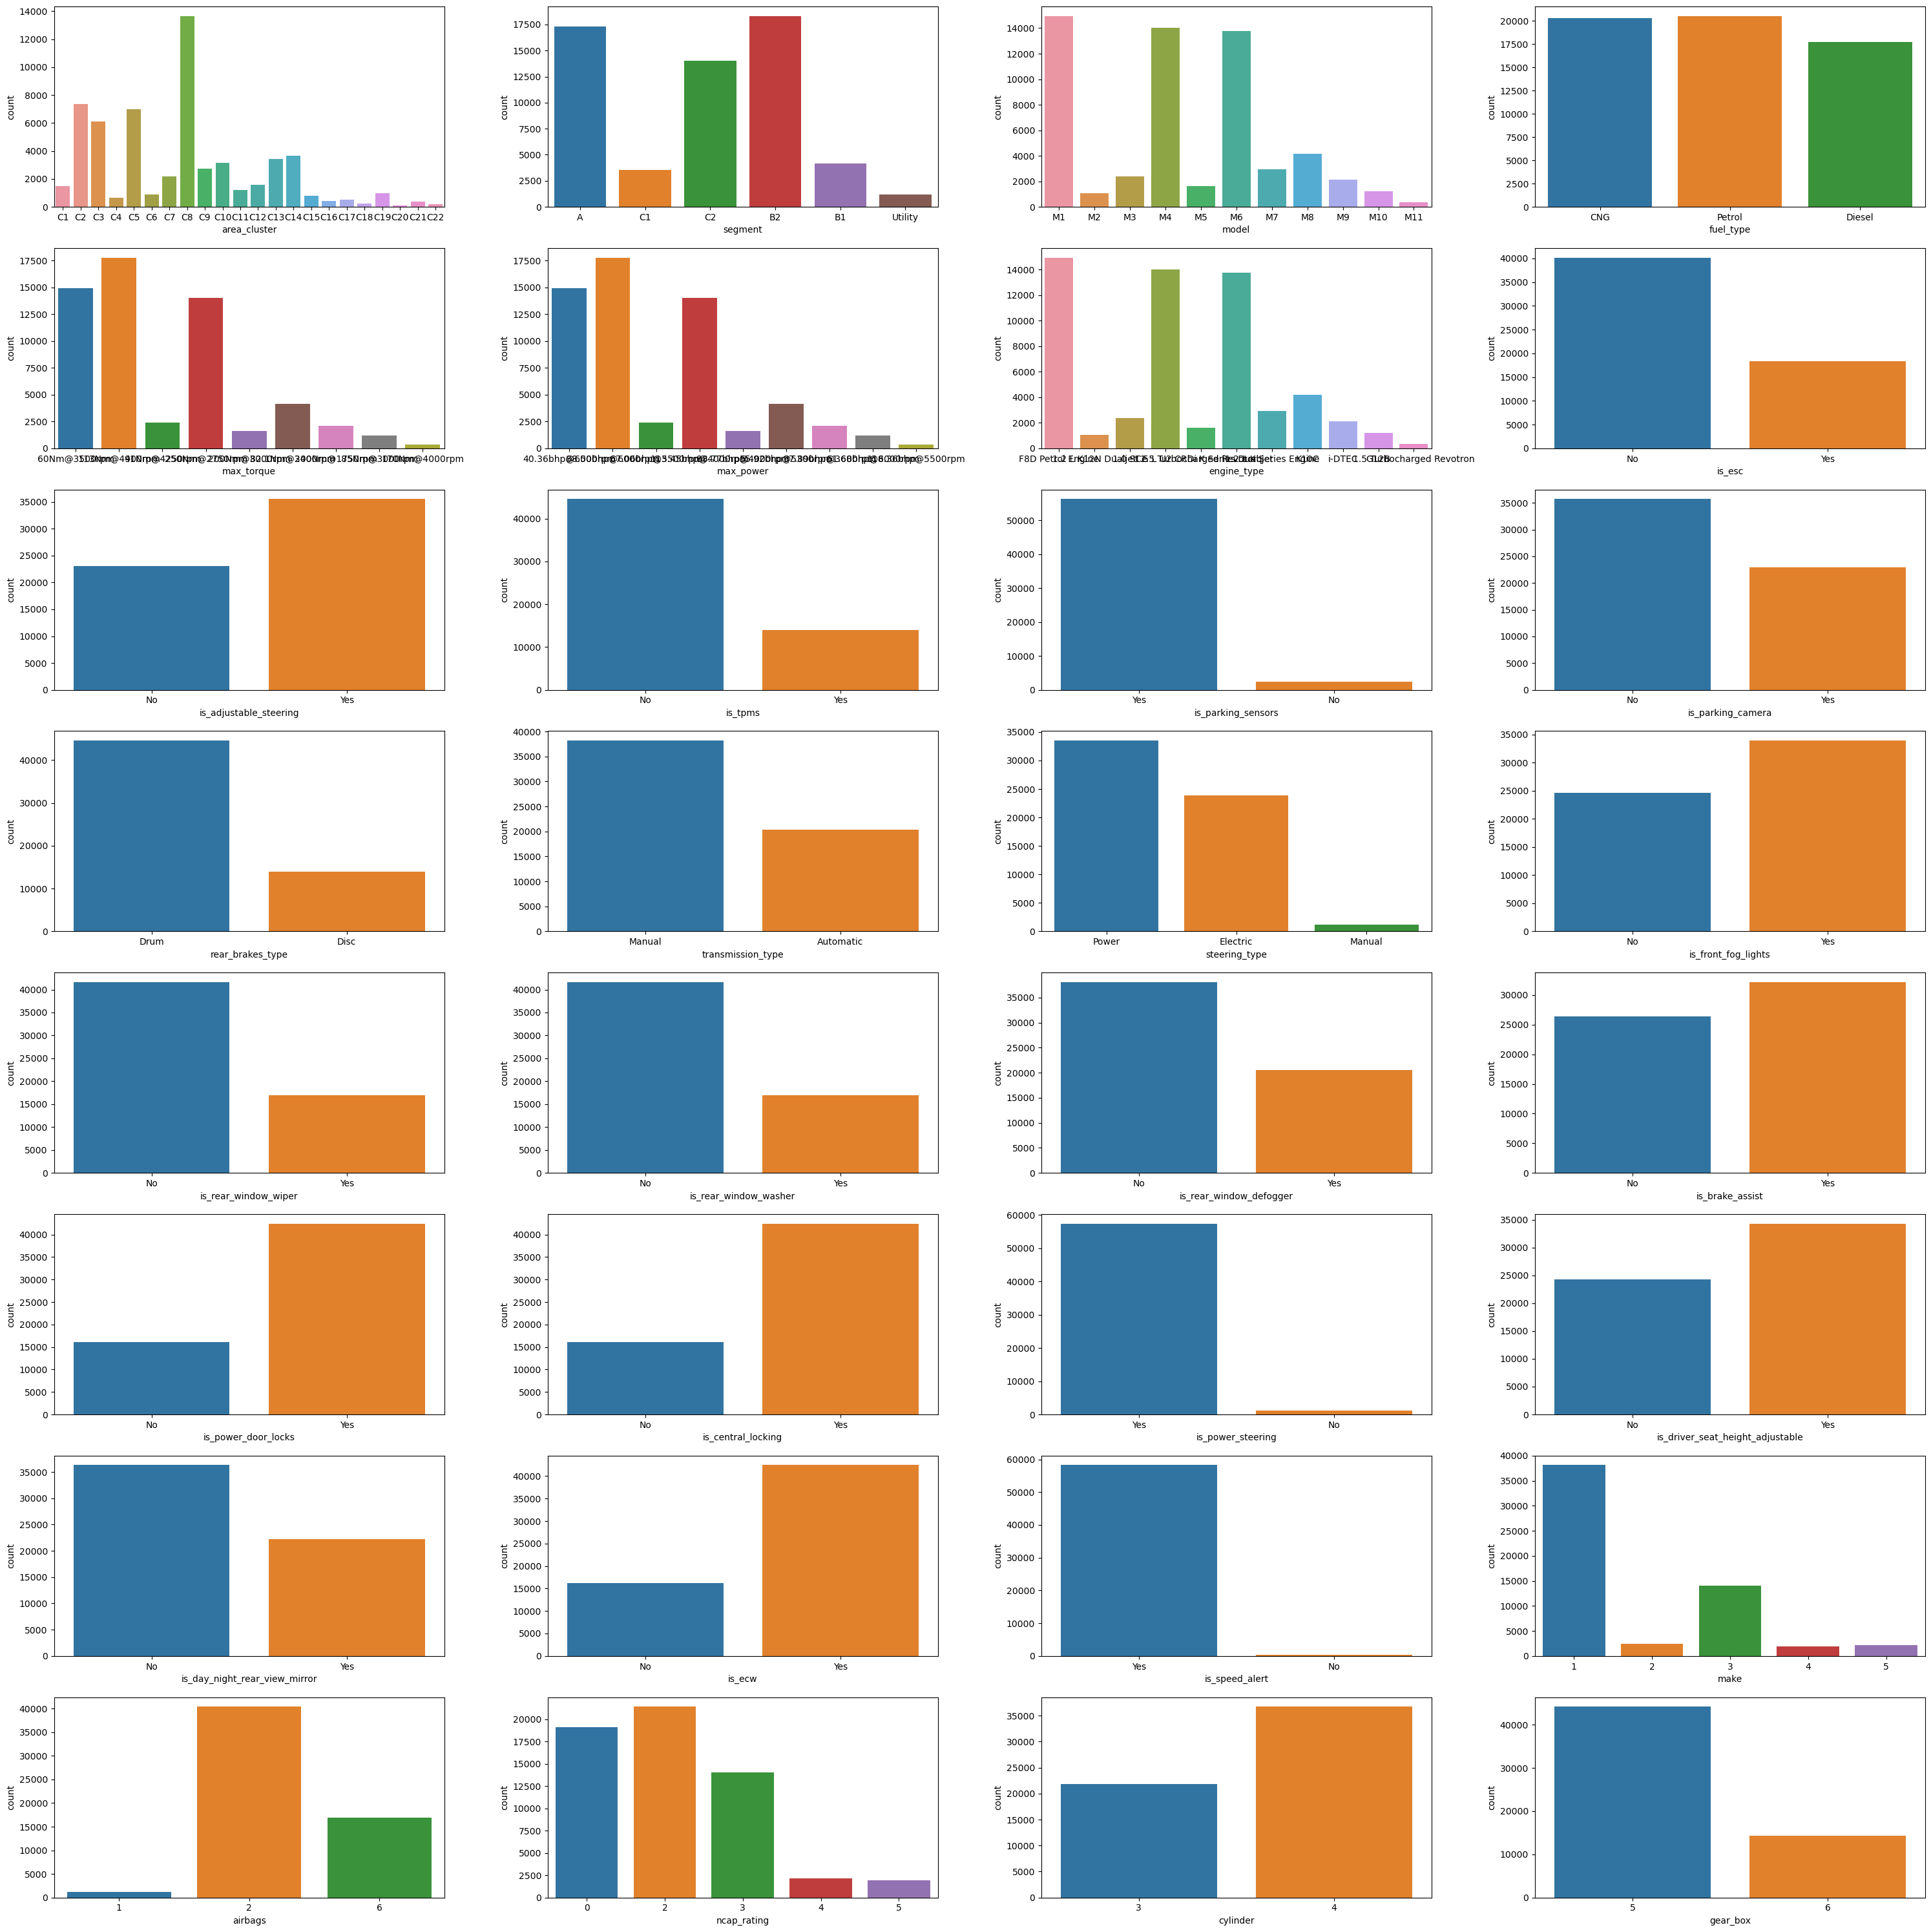

In [16]:
nrows = 8
ncols = 4
iterator = 1

plt.figure(figsize = (30, 30))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(x = i, data = train)
    iterator+=1
    
plt.tight_layout()
plt.show()

# C8 is the biggest area cluster
# Highest Segment is B2, C2 and A
# Model: M1, M4 and M6
# Fuel Type: CNG and Petrol
# 

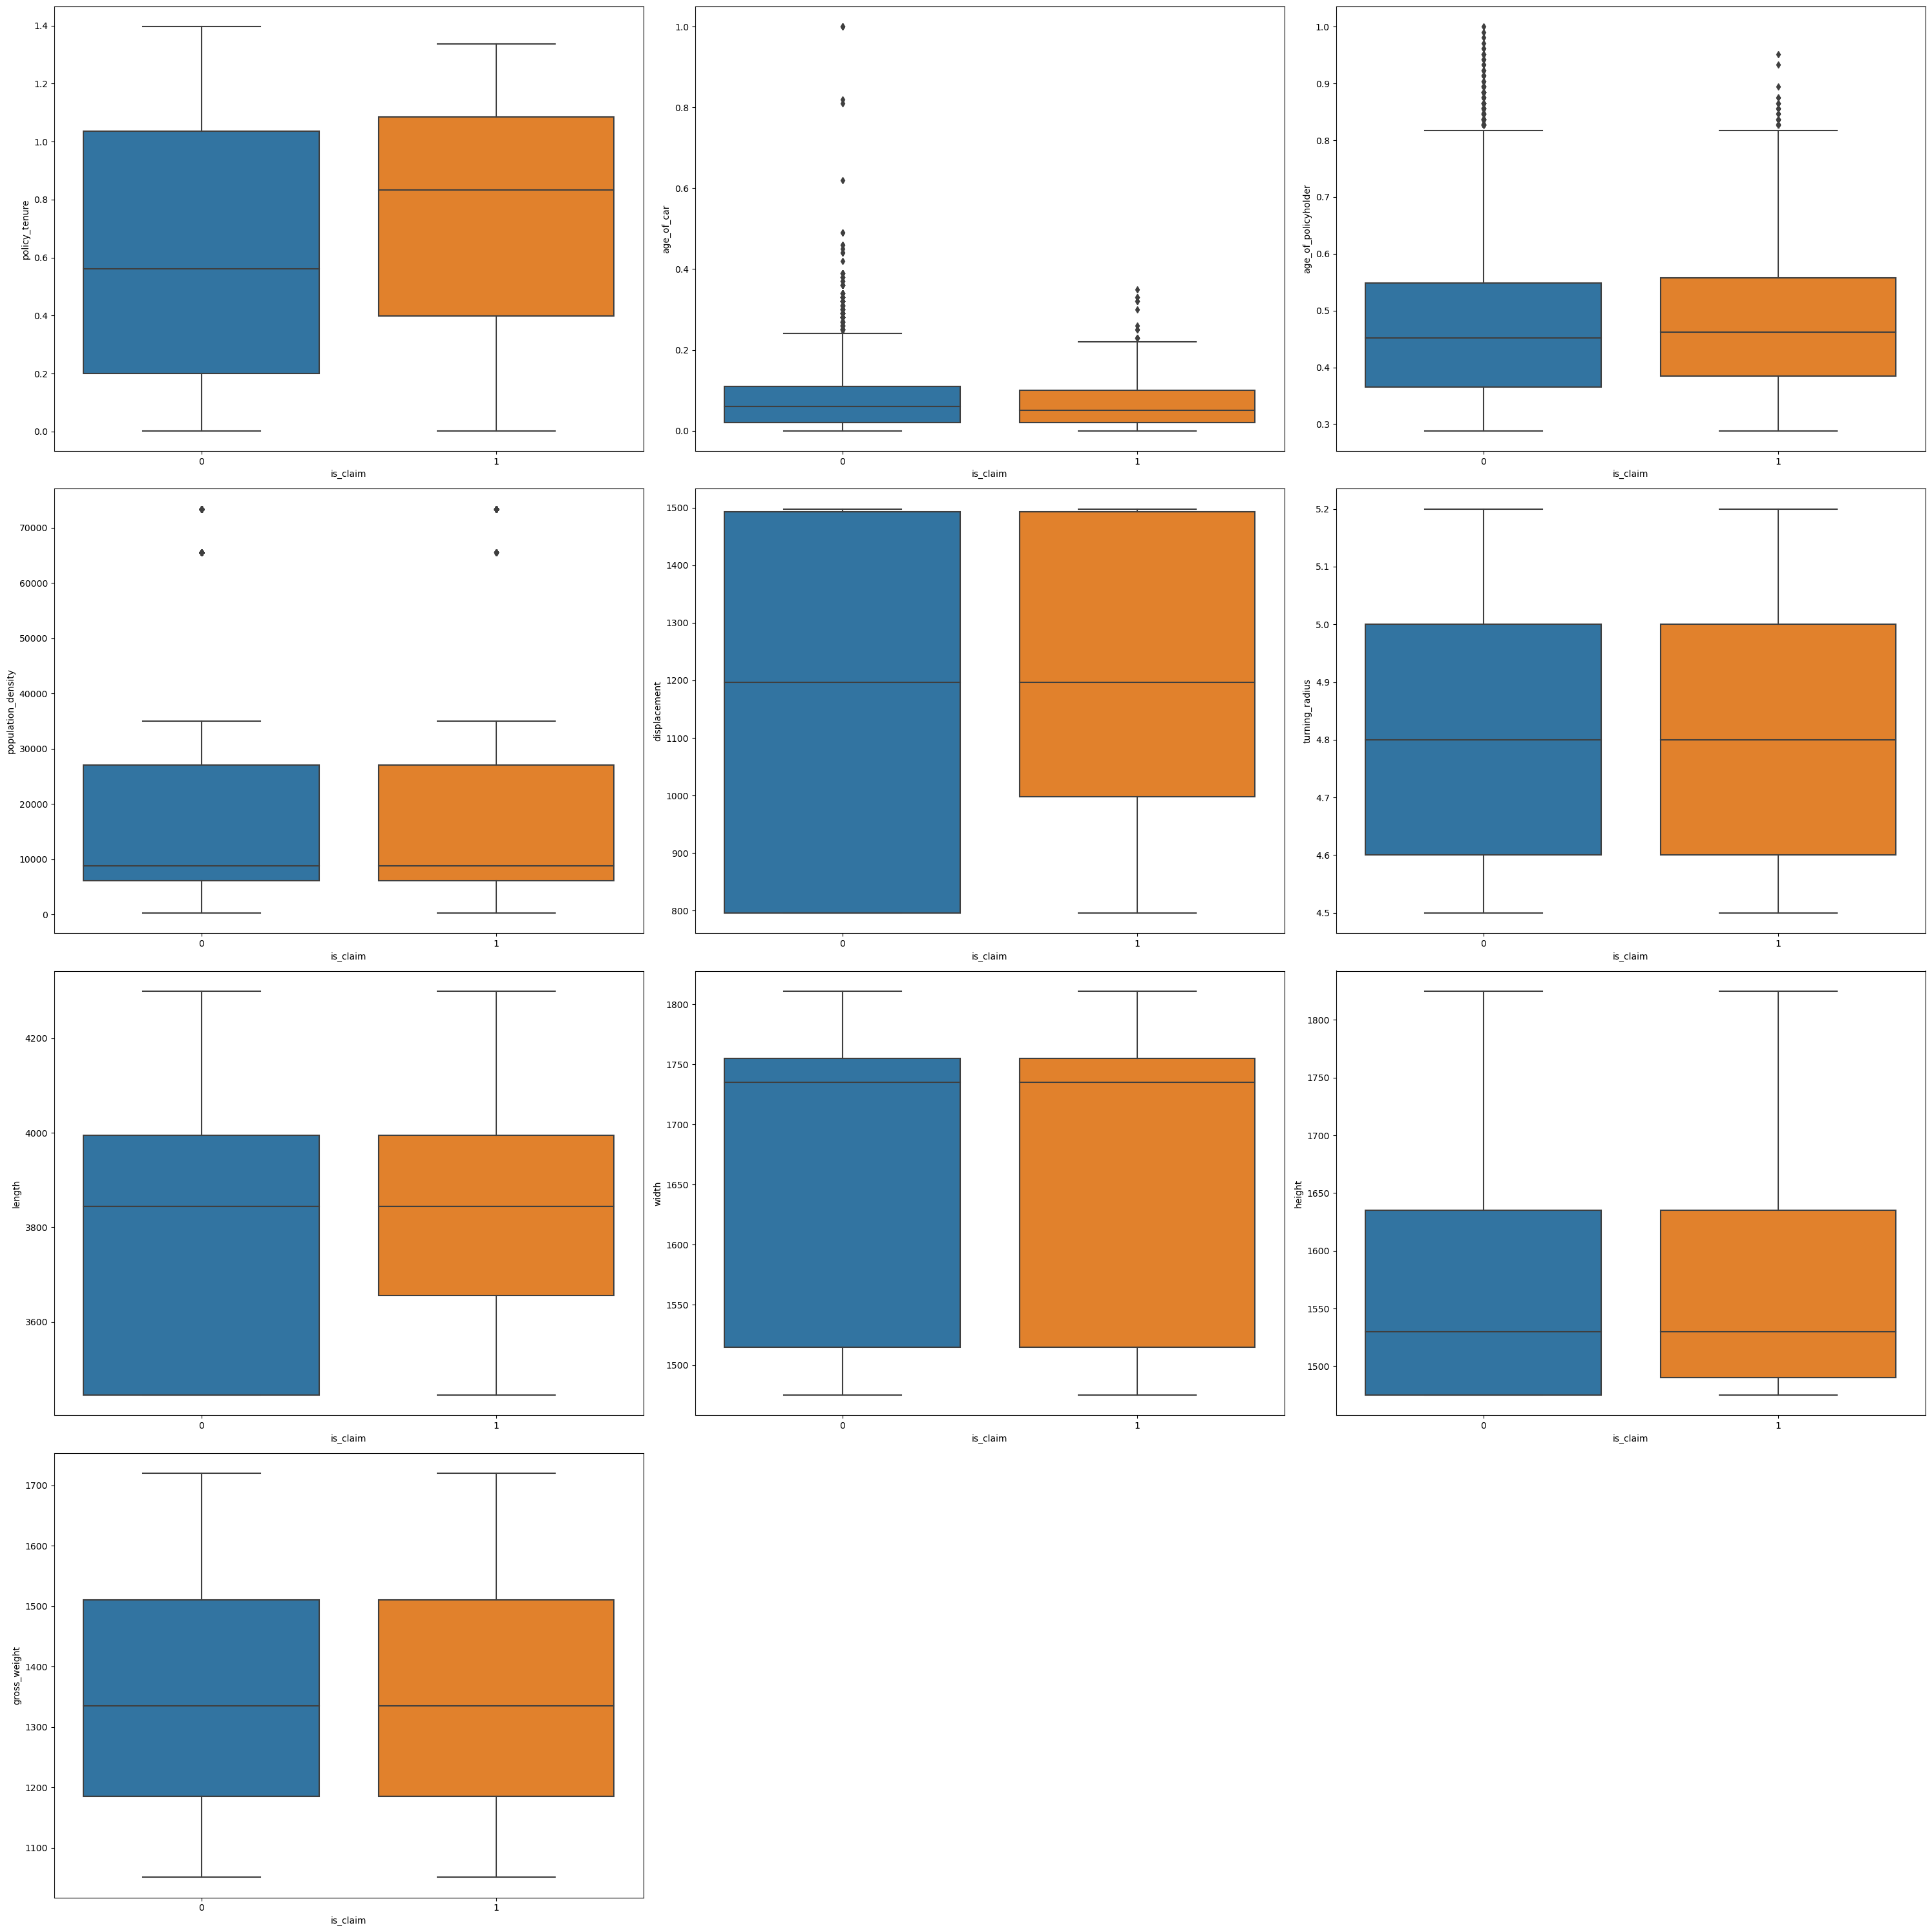

In [17]:
# Bivariate Analysis: Num vs Cat
nrows = 4
ncols = 3
iterator = 1

plt.figure(figsize = (30, 30))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(y = i, x = "is_claim", data = train)
    iterator+=1
    
plt.tight_layout()
plt.show()

<Figure size 3000x3000 with 0 Axes>

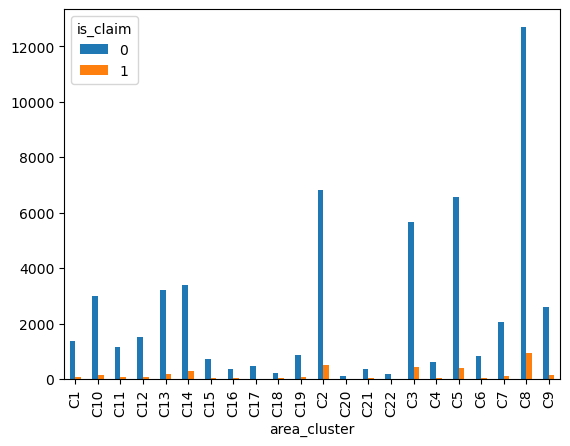

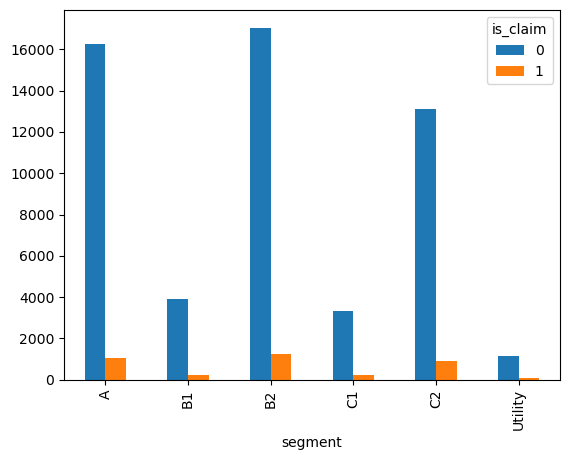

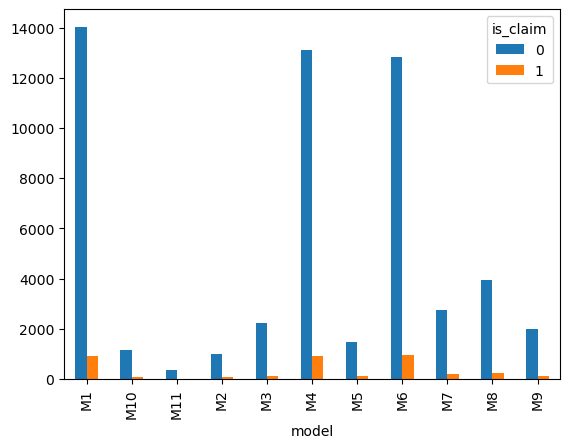

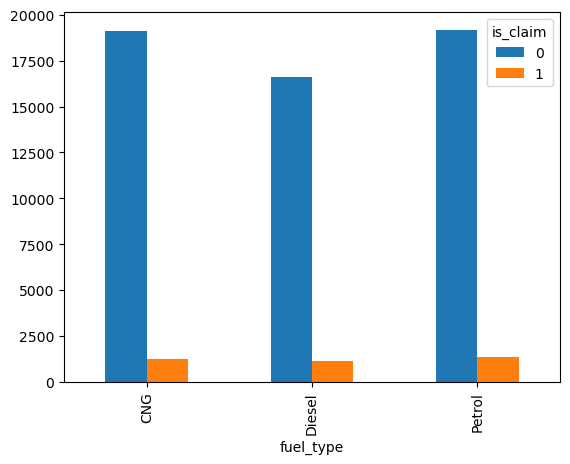

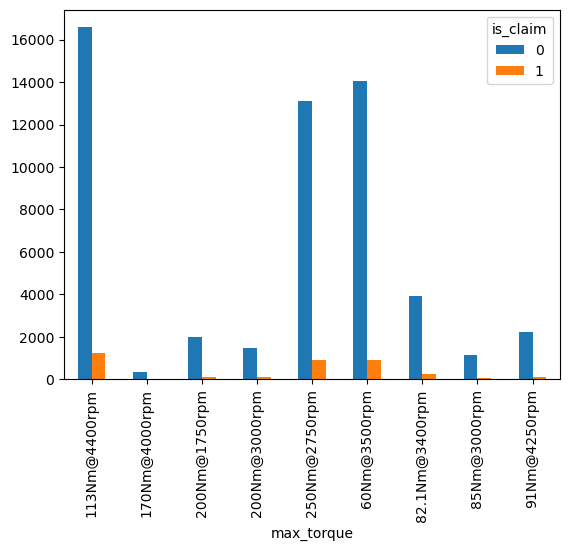

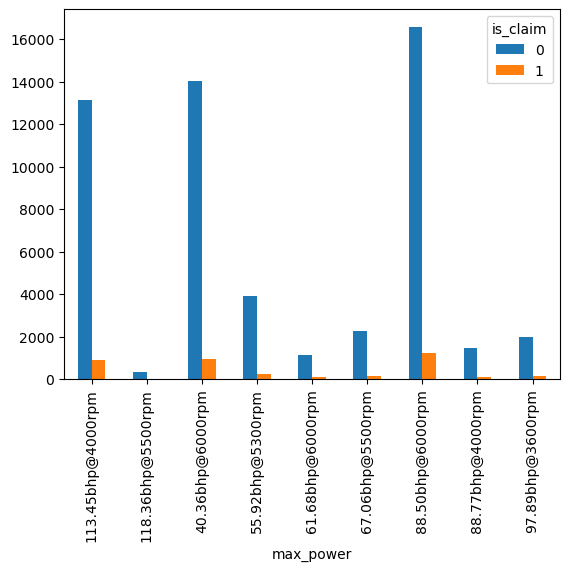

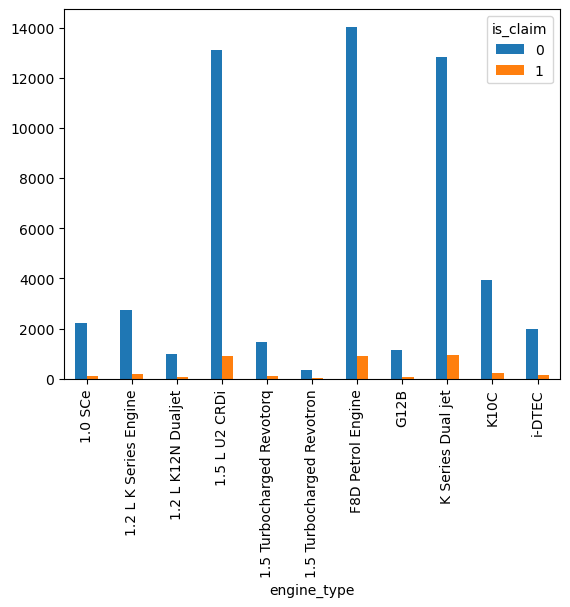

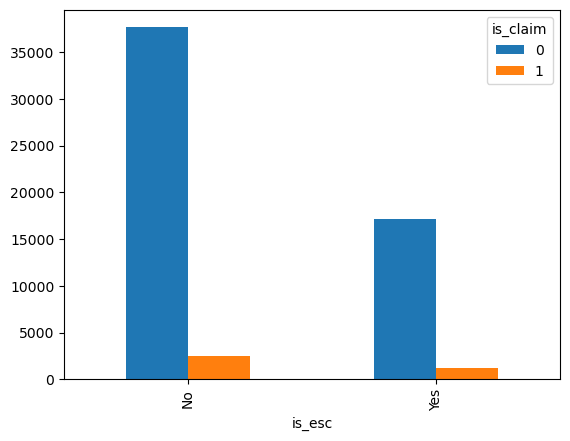

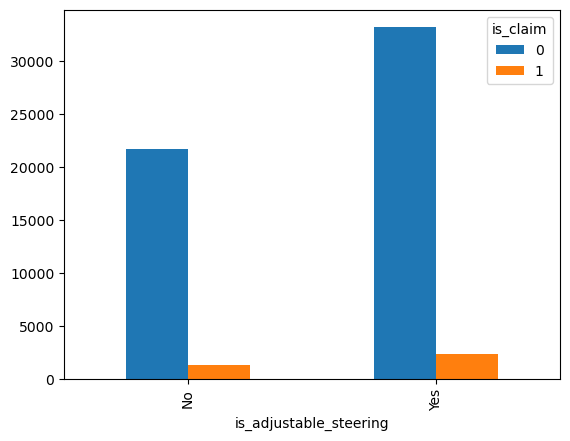

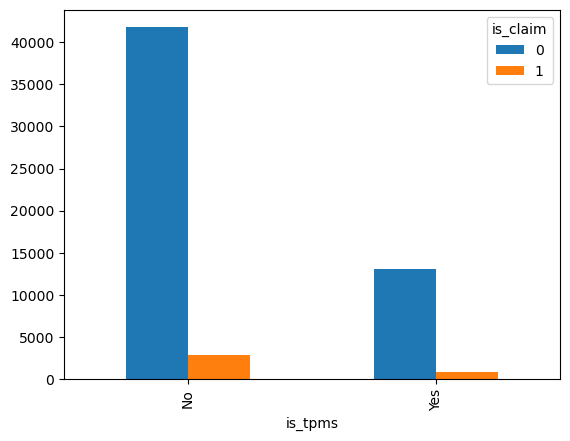

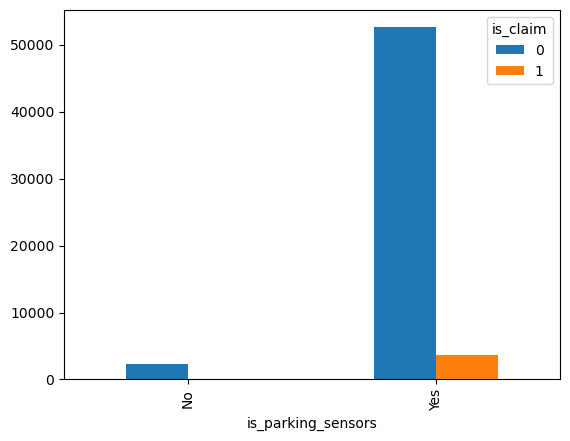

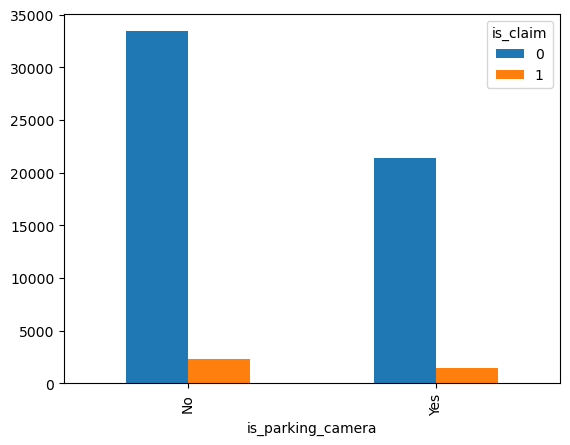

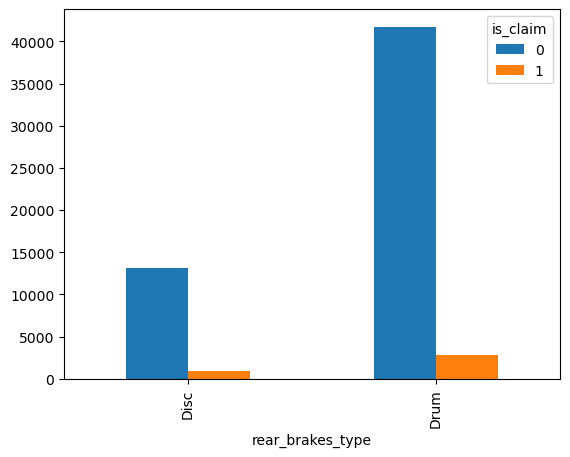

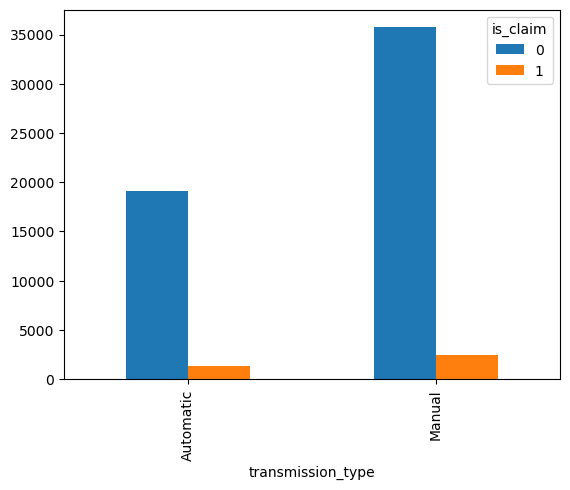

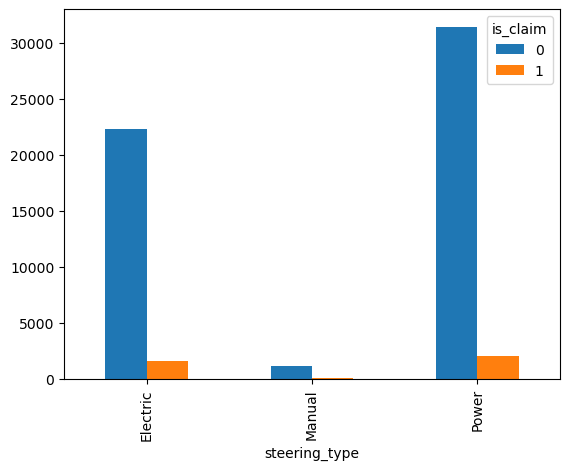

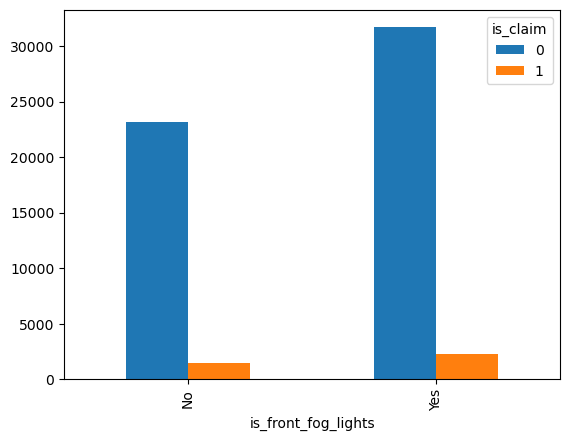

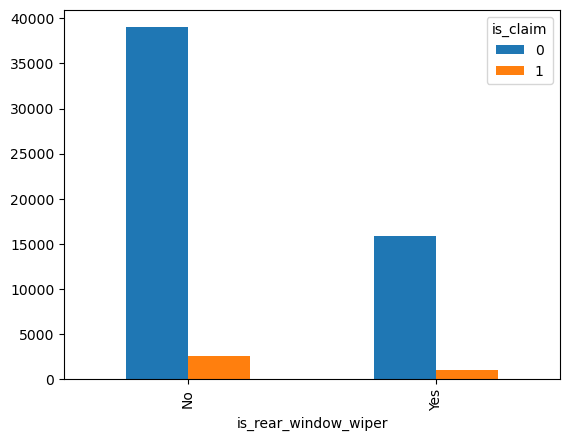

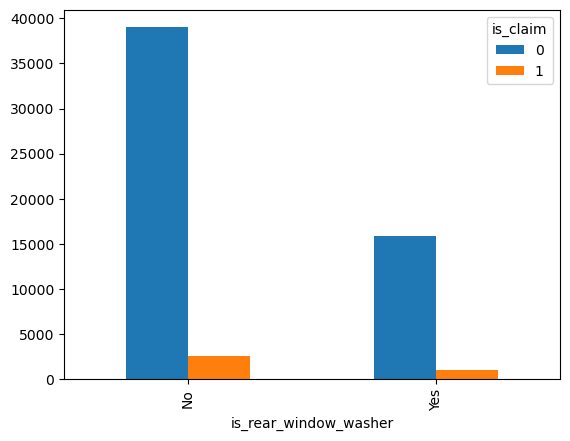

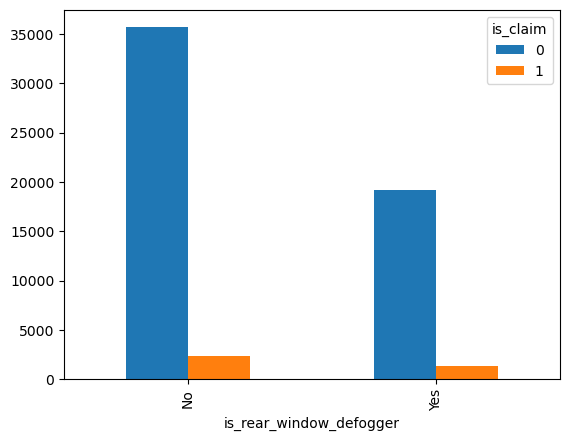

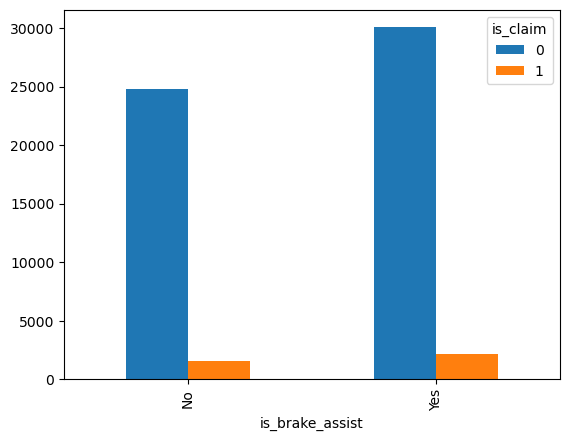

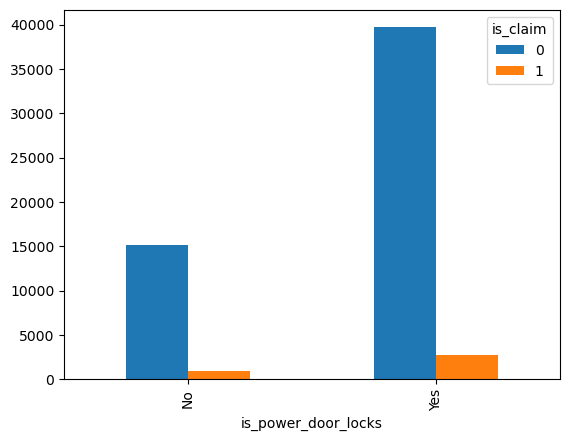

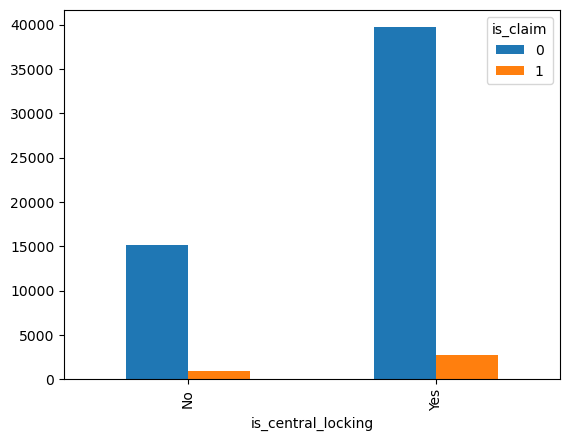

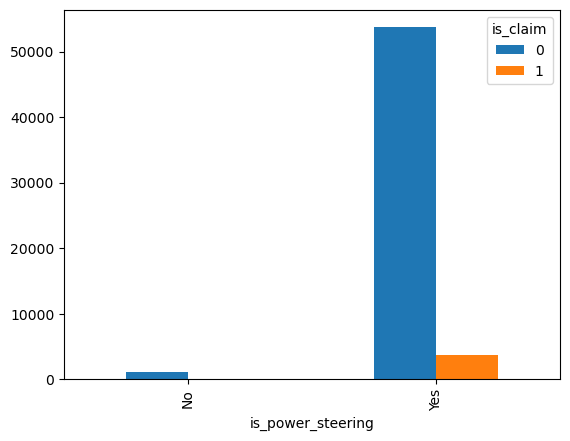

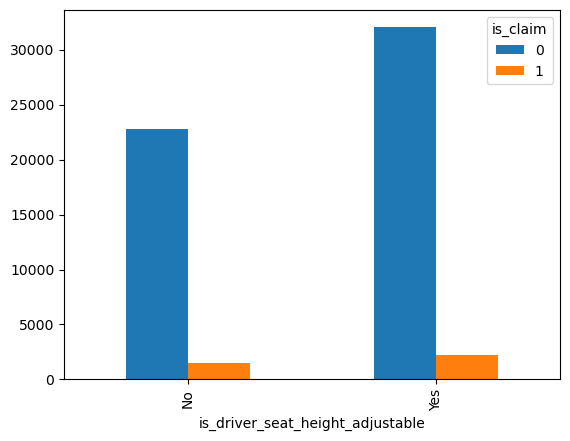

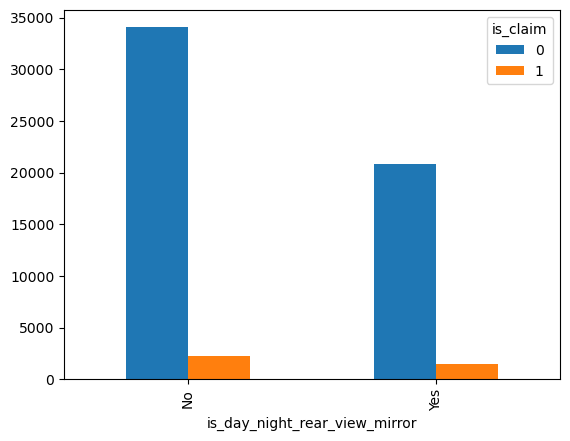

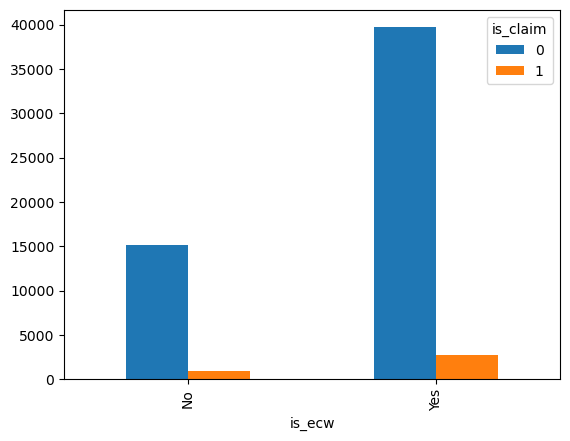

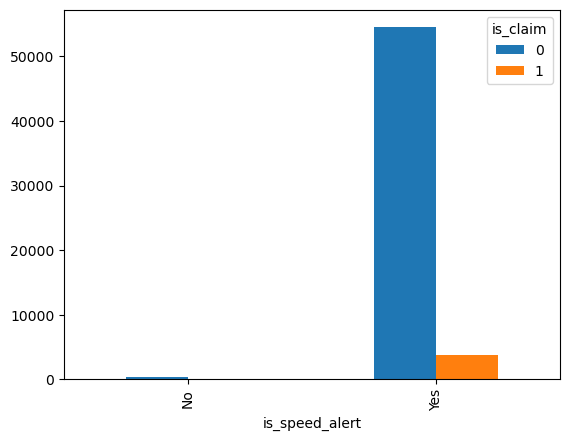

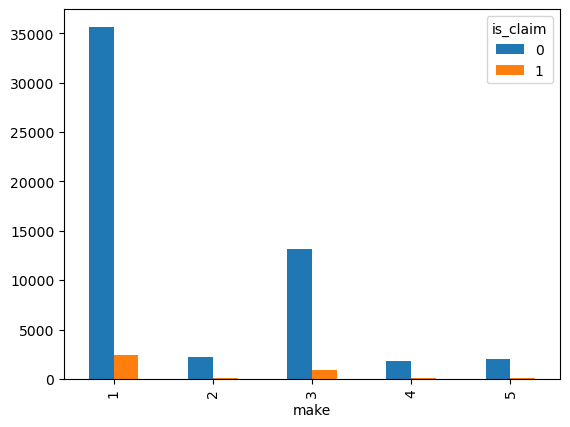

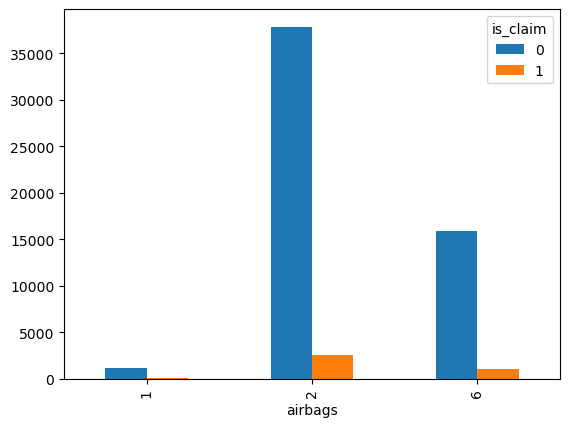

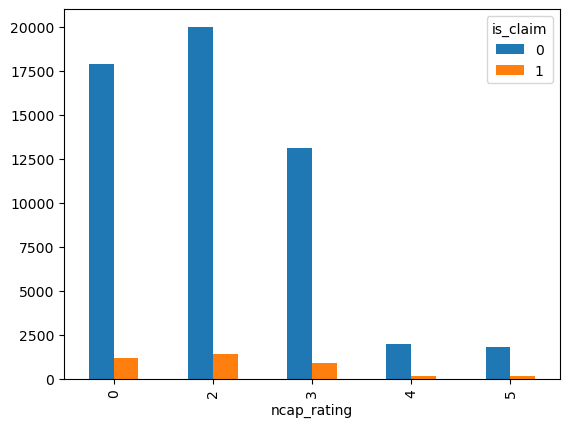

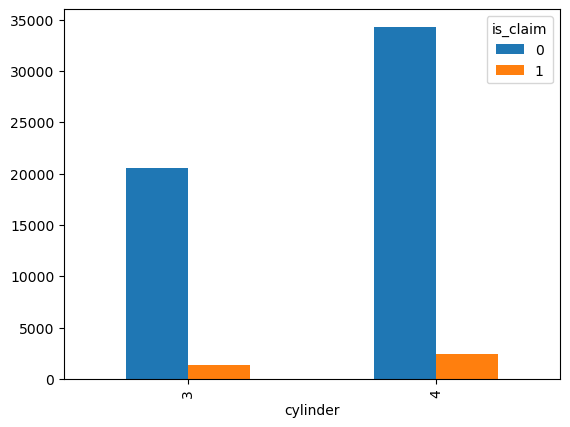

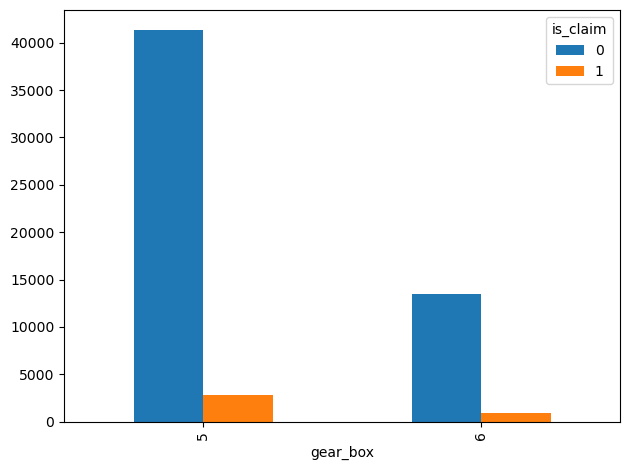

In [18]:
# Cat vs Cat

nrows = 8
ncols = 4
iterator = 1

plt.figure(figsize = (30, 30))
for i in cat_cols:
    tbl = pd.crosstab(train.loc[:,i], train.is_claim)
    #sns.countplot(x = i, data = train)
    tbl.plot(kind = "bar")
    iterator+=1
    
plt.tight_layout()
plt.show()

In [19]:
# Missing Values

train.isnull().sum().sum()

0

### Feature Engineering

In [20]:
# 'max_torque', 'max_power'

train[["Nm", "torque_rpm"]] = \
train.max_torque.str.split("@", expand = True)

In [21]:
train["Nm"] = train.Nm.apply(lambda x:x[:-2])
train["Nm"] = pd.to_numeric(train.Nm)

In [22]:
train["torque_rpm"] = train.torque_rpm.apply(lambda x:x[:-3])
train["torque_rpm"] = pd.to_numeric(train.torque_rpm)

In [23]:
train[["bhp", "rpm_power"]] = \
train.max_power.str.split("@", expand = True)

In [24]:
#train.rpm_power.apply(lambda x:x[:-3])

In [25]:
train["bhp"] = train.bhp.apply(lambda x:x[:-3])
train["bhp"] = pd.to_numeric(train.bhp)

In [26]:
train["rpm_power"] = train.rpm_power.apply(lambda x:x[:-3])
train["rpm_power"] = pd.to_numeric(train.rpm_power)

In [27]:
pd.set_option("display.max_columns", 60)
train.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'Nm',
       'torque_rpm', 'bhp', 'rpm_power'],
      dtype='object')

In [28]:
colnames = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

mapped = {"Yes":1, "No":0}

for i in colnames:
    train.loc[:, i] = train.loc[:, i].map(mapped)

In [29]:
train.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,torque_rpm,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000


In [30]:
# Area Cluster

pd.crosstab(train.area_cluster, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["C8", "C2", "C3", "C5", "C14"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Cluster")
    else:
        return("LC_Cluster")

In [31]:
train["area_cluster"] = train.area_cluster.apply(cluster_cat)

In [32]:
# Ho: Area Cluster has no relation with the claims received
# Ha: Ho is False

import scipy.stats as stats
tbl = pd.crosstab(train.area_cluster, train.is_claim)

teststats, pvalue, df, exp = stats.chi2_contingency(tbl)
print(pvalue)

4.736737378350726e-10


In [33]:
# Segment, Model and then Engine Type

pd.crosstab(train.segment, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["C2", "B2", "A"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Seg")
    else:
        return("LC_Seg")

In [34]:
train["segment"] = train.segment.apply(cluster_cat)

In [35]:
pd.crosstab(train.model, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["M6", "M1", "M4"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Model")
    else:
        return("LC_Model")

In [36]:
train["model"] = train.model.apply(cluster_cat)

In [37]:
train.model.value_counts(normalize = True)

HC_Model    0.729485
LC_Model    0.270515
Name: model, dtype: float64

In [38]:
pd.crosstab(train.engine_type, train.is_claim).\
sort_values(by = 1,ascending = False)

clusters = ["K Series Dual jet", 
            "F8D Petrol Engine", 
            "1.5 L U2 CRDi"]

def cluster_cat(x):
    if x in clusters:
        return("HC_Engine")
    else:
        return("LC_Engine")

In [39]:
train["engine_type"] = train.engine_type.apply(cluster_cat)

In [40]:
train.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,torque_rpm,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,LC_Cluster,4990,1,HC_Seg,HC_Model,CNG,60Nm@3500rpm,40.36bhp@6000rpm,HC_Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
1,ID00002,0.672619,0.02,0.375000,HC_Cluster,27003,1,HC_Seg,HC_Model,CNG,60Nm@3500rpm,40.36bhp@6000rpm,HC_Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000


In [41]:
# NCap Rating
pd.crosstab(train.ncap_rating, train.is_claim).\
sort_values(by = 1,ascending = False)

is_claim,0,1
ncap_rating,,
2,20011,1391
0,17905,1192
3,13117,901
4,1981,133
5,1830,131


In [42]:
train["ncap_rating"] = train.ncap_rating.\
apply(lambda x:"Low_Claim_HR" 
      if x in [4, 5] 
      else "High_Claim_LR")

In [43]:
# Drop the Unnecessary Columns
newtrain = train.drop(["policy_id", "max_torque", "max_power"], 
          axis = 1)

### Statistical Test

In [44]:
kya_naam_de = newtrain.select_dtypes(exclude = np.number).columns

In [45]:
imp = []
for i in colnames:
    tbl = pd.crosstab(newtrain.loc[:, i], newtrain.is_claim)
    teststats,pvalue, df, exp = stats.chi2_contingency(tbl)
    #print(i, pvalue)
    if pvalue<0.05:
        imp.append(i)

In [46]:
final_cats = imp+["area_cluster"]
print(final_cats)

['is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable', 'area_cluster']


In [47]:
nums = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 
        'Nm', 'torque_rpm', 'bhp','rpm_power',
       'displacement','turning_radius', 'length', 
        'width', 'height', 'gross_weight']

num_imp = []
for i in nums:
    zero = newtrain.loc[newtrain.is_claim==0, i]
    one = newtrain.loc[newtrain.is_claim==1, i]
    teststats, pvalue = stats.ttest_ind(zero, one)
    #print(i, pvalue)
    if pvalue<0.05:
        num_imp.append(i)

In [48]:
# X and ys...
X = pd.get_dummies(newtrain.loc[:, num_imp+final_cats], 
                   drop_first = True)
y = newtrain.is_claim

#### Model Building Stage

* Here we will apply Stratified K Fold. Stratified K Fold is used for Classification models where the focus on the Minority class and hence the Algo will be able to split the data accordingly.


In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression()
nbayes = GaussianNB()

kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True, random_state = 123)

predictions = []
nb_pred = []

for train_idx, test_idx in kfold.split(X, y):
    xtrain = X.iloc[train_idx]
    ytrain = y.iloc[train_idx]
    xtest = X.iloc[test_idx]
    ytest = y.iloc[test_idx]
    pred = logreg.fit(xtrain, ytrain).predict(xtest)
    pred_nb = nbayes.fit(xtrain, ytrain).predict(xtest)
    predictions.append(pred)
    nb_pred.append(pred_nb)

In [50]:
log_pred = pd.DataFrame(predictions).T.mode(axis = 1)

### Model Metrics


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

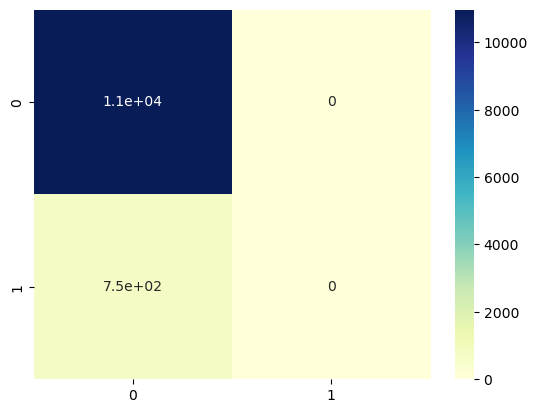

In [52]:
# ytest, pred
sns.heatmap(confusion_matrix(ytest, log_pred[1:]), 
            annot = True, cmap = "YlGnBu")
plt.show()

In [53]:
print(classification_report(ytest, log_pred[1:]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10968
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11718
   macro avg       0.47      0.50      0.48     11718
weighted avg       0.88      0.94      0.91     11718



In [54]:
# Naive Bayes Prediction
predict = pd.DataFrame(nb_pred).T.mode(axis = 1)
print(classification_report(ytest, predict[1:]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10968
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11718
   macro avg       0.47      0.50      0.48     11718
weighted avg       0.88      0.94      0.91     11718



### Smote

* SMOTE is known as Synthetic Minority Oversampling Technique

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

In [57]:
y_resampled.value_counts(normalize = True)

0    0.5
1    0.5
Name: is_claim, dtype: float64

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression()
nbayes = GaussianNB()

kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True, random_state = 123)

predictions = []
nb_pred = []

for train_idx, test_idx in kfold.split(X_resampled, y_resampled):
    xtrain = X_resampled.iloc[train_idx]
    ytrain = y_resampled.iloc[train_idx]
    xtest = X_resampled.iloc[test_idx]
    ytest = y_resampled.iloc[test_idx]
    pred = logreg.fit(xtrain, ytrain).predict(xtest)
    pred_nb = nbayes.fit(xtrain, ytrain).predict(xtest)
    predictions.append(pred)
    nb_pred.append(pred_nb)

In [59]:
log_pred = pd.DataFrame(predictions).T.mode(axis = 1)

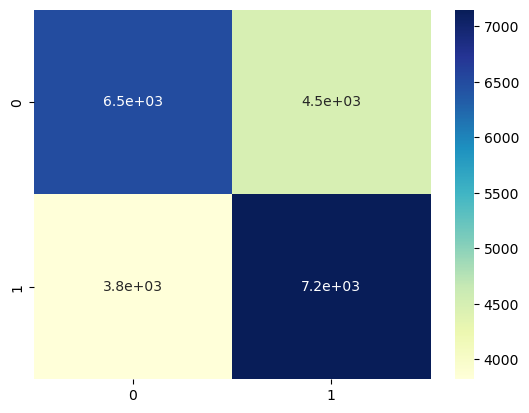

In [60]:
sns.heatmap(confusion_matrix(ytest, log_pred[1:]), 
            annot = True, cmap = "YlGnBu")
plt.show()

In [61]:
print(classification_report(ytest, log_pred[1:]))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61     10968
           1       0.62      0.65      0.63     10969

    accuracy                           0.62     21937
   macro avg       0.62      0.62      0.62     21937
weighted avg       0.62      0.62      0.62     21937



In [62]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True, random_state = 123)
pred_tree = []

for train_idx, test_idx in kfold.split(X_resampled, y_resampled):
    xtrain = X_resampled.iloc[train_idx]
    ytrain = y_resampled.iloc[train_idx]
    xtest = X_resampled.iloc[test_idx]
    ytest = y_resampled.iloc[test_idx]
    pred = dtree.fit(xtrain, ytrain).predict(xtest)
    pred_tree.append(pred)

In [63]:
pred_tree = pd.DataFrame(pred_tree).T.mode(axis = 1)
print(classification_report(ytest, pred_tree[1:]))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10968
           1       0.99      0.93      0.96     10969

    accuracy                           0.96     21937
   macro avg       0.96      0.96      0.96     21937
weighted avg       0.96      0.96      0.96     21937



### KNN

* It is the simplest model which relies on distance metrics to make the prediction.

* Basic Princiole- It will find the 'K' nearest neighbours and will calculate the distance of the point and will the prediction on the basis of the shortest distance between the points.

* Regression: In Regression, it will take the average value of the neighbors and will generate the prediction.

* Classificiation- The nearest possible distance will be classified accordingly. For example: if the distance with the 0 class is the least, it will classified as 0. 

* It will easy to interept and explain in comparision to the Neural Net.

* Challenge: Large Datasets. So, if the data is suffereing from the Curse of Dimensionality, then the KNN will fail miserable.

* What happens during fit and predict. When we fit the model, knn stores the data and while predicting, it calculates the distance using Distance metrics and then generates the prediction.

In [64]:
#Lets find the K-Value
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Range of k to try
#9783302129


k_range=range(1,30)
knn_scores=[]

from sklearn.model_selection import cross_val_score
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(estimator=knn,X=X,y=y,scoring='recall')
    
    knn_scores.append(scores.mean())
    

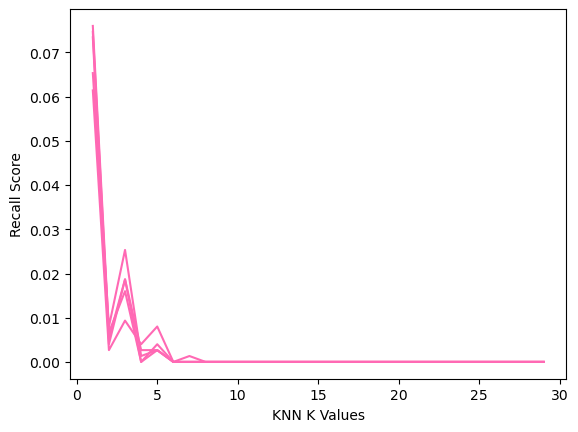

In [67]:
#Plot the knn
plt.plot(k_range,knn_scores,color='hotpink')
plt.xlabel('KNN K Values')
plt.ylabel('Recall Score')
plt.show()


In [72]:
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(estimator=knn,X=X_resampled,y=y_resampled,scoring='recall')
    
    knn_scores.append(scores.mean())
    

In [ ]:
# ideal k value
best=k_range[np.argmax(knn_scores)]
print(f'k value for the data is {best})

In [70]:
knn=KNeighborsClassifier(n_neighbors=7)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_resampled,y_resampled,
                                          test_size=0.30,
                                          random_state=420)

In [71]:
pred=knn.fit(xtrain,ytrain).predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77     16414
           1       0.74      0.92      0.82     16493

    accuracy                           0.80     32907
   macro avg       0.82      0.80      0.79     32907
weighted avg       0.82      0.80      0.79     32907



# Pruning of Decison Trees

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

params={'criterion':['gini','entropy','log_loss'],
        'splitter':['best','random'],
        'max_depth':[3,4,5,6,7],
        'min_samples_split':[50,100,150,200]}
grid=GridSearchCV(estimator=dtree,
                 param_grid=params,
                 cv=5)

In [75]:
# fit the model
grid.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200],
                         'splitter': ['best', 'random']})

In [76]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 100,
 'splitter': 'best'}

In [77]:
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=7,
                            min_samples_split=50,
                            splitter='best')

In [78]:
pred=dtree.fit(xtrain,ytrain).predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69     16414
           1       0.68      0.84      0.75     16493

    accuracy                           0.72     32907
   macro avg       0.74      0.72      0.72     32907
weighted avg       0.74      0.72      0.72     32907

